# Dynamic chaos in the kicked “photon-qubit atom"

## Anisotropic Rabi Model

## Plot mapping for system

In [28]:
import numpy as np
import math as mp
import matplotlib as mpl
import matplotlib.pyplot as plt
import qutip
from tqdm import trange, notebook
from time import sleep
from odeintw import odeintw
from pylab import *
from matplotlib import cm
import time


#  define system of motion equations 
def func(z,t):
    p, q, u, v = z
    return [-w**2*q - 2*gx*gy*(np.abs(u)**2 - np.abs(v)**2) +\
            (gy*w2 - gx)*(np.conj(u)*v + np.conj(v)*u), p, 
            ((w2/2)*u + gx*q*v - gy*1j*p*v)/1j, (-(w2/2)*v + gx*q*u + gy*1j*p*u)/1j]

#  initial conditions
#-----------------------
w = 1                  #  photonic field frequency
w2 = w                 #  qubit frequency
r = 1/5              #  frequency ratio
Tk = 2 * np.pi * r / w     #  period of an external driving force 

gx = 0.41
gy = gx
phi = 20              #  external driving force amplitude
q0 = 1                 #  initial coordinate
p0 = 1                 #  initial impulse
u0 = np.sqrt(1e-20/2)      #  initial spinor component U
v0 = np.sqrt(2/2)      #  initial spinor component V

n_steps = 25000       #  number of periods

print('Tk = ', Tk)
print('T = ', 2 * np.pi / w)


Q = np.zeros(n_steps + 1, dtype=complex) 
P = np.zeros(n_steps + 1, dtype=complex)    
U = np.zeros(n_steps + 1, dtype=complex)   
V = np.zeros(n_steps + 1, dtype=complex)

P[0] = p0
Q[0] = q0
U[0] = u0
V[0] = v0

mxsteps = n_steps  #  step number in solving diff. equation

if n_steps <= 1000:
    mxsteps = 1000

#  mapping for (p, q, u, v)
for n in notebook.tqdm(range(1, n_steps+1)):

    tn = Tk * (n - 1)

    p01 = P[n - 1]
    q01 = Q[n - 1]    
    u01 = (np.cos(phi) * U[n - 1] - 1j * np.sin(phi) * V[n - 1])
    v01 = (-1j*np.sin(phi) * U[n - 1] + np.cos(phi) * V[n - 1])
    
    
    z0 = [p01, q01, u01, v01]

    sol = odeintw(func, z0, [tn ,tn + Tk], mxstep=500000)
    #print(sol)
    P[n] = sol[-1,0]
    Q[n] = sol[-1,1]
    U[n] = sol[-1,2]
    V[n] = sol[-1,3]
#print(Q)

Tk =  1.2566370614359172
T =  6.283185307179586


  0%|          | 0/25000 [00:00<?, ?it/s]

<Figure size 1500x1200 with 0 Axes>

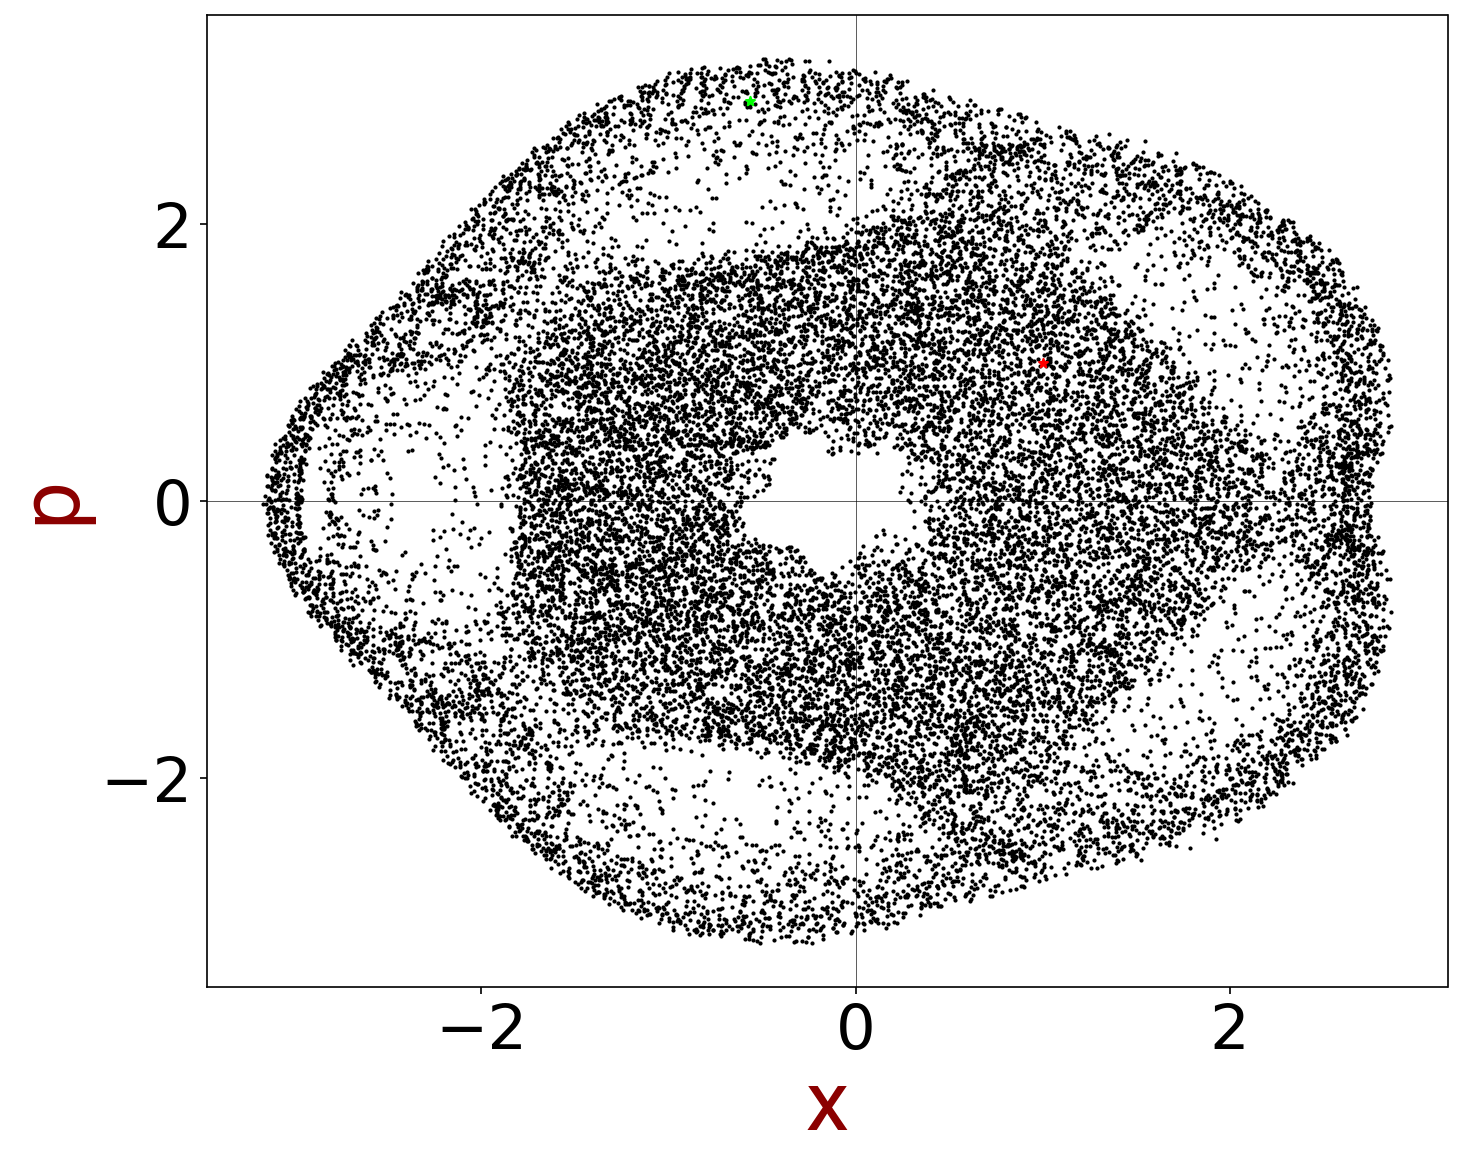

In [29]:
#  plot for (p, x)

textsize = 30
#  plot for (p, x)
fig = plt.figure(figsize=(10,8), dpi=150)

font = {'family': 'helvetica',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

fontTitle = {'family': 'helvetica',
        'color':  'darkred',
        'weight': 'bold',
        'size': textsize,
        }

fig = plt.figure(figsize=(10,8), dpi=150)

plt.xlabel('x', fontdict=font)
plt.ylabel('p', fontdict=font)

plt.scatter(np.round(Q.real[1:-2], 3),np.round(P.real[1:-2], 3), s=1, c='black')
plt.scatter(np.round(Q.real[0], 3),np.round(P.real[0], 3), marker='*', s=20, c='red')
plt.scatter(np.round(Q.real[-1], 3),np.round(P.real[-1], 3), marker='*', s=20, c='lime')
plt.axhline(y=0, color='k', lw=0.3)
plt.axvline(x=0, color='k', lw=0.3)
plt.tick_params(labelsize=textsize)
#plt.grid()
plt.tight_layout()
plt.show()
fig.savefig('images/qubit/arabi/qubit_px,' + 'r=' +str(r) + ',f0=' + str(phi) + ',gx=' + str(gx) + '.png', dpi=fig.dpi)

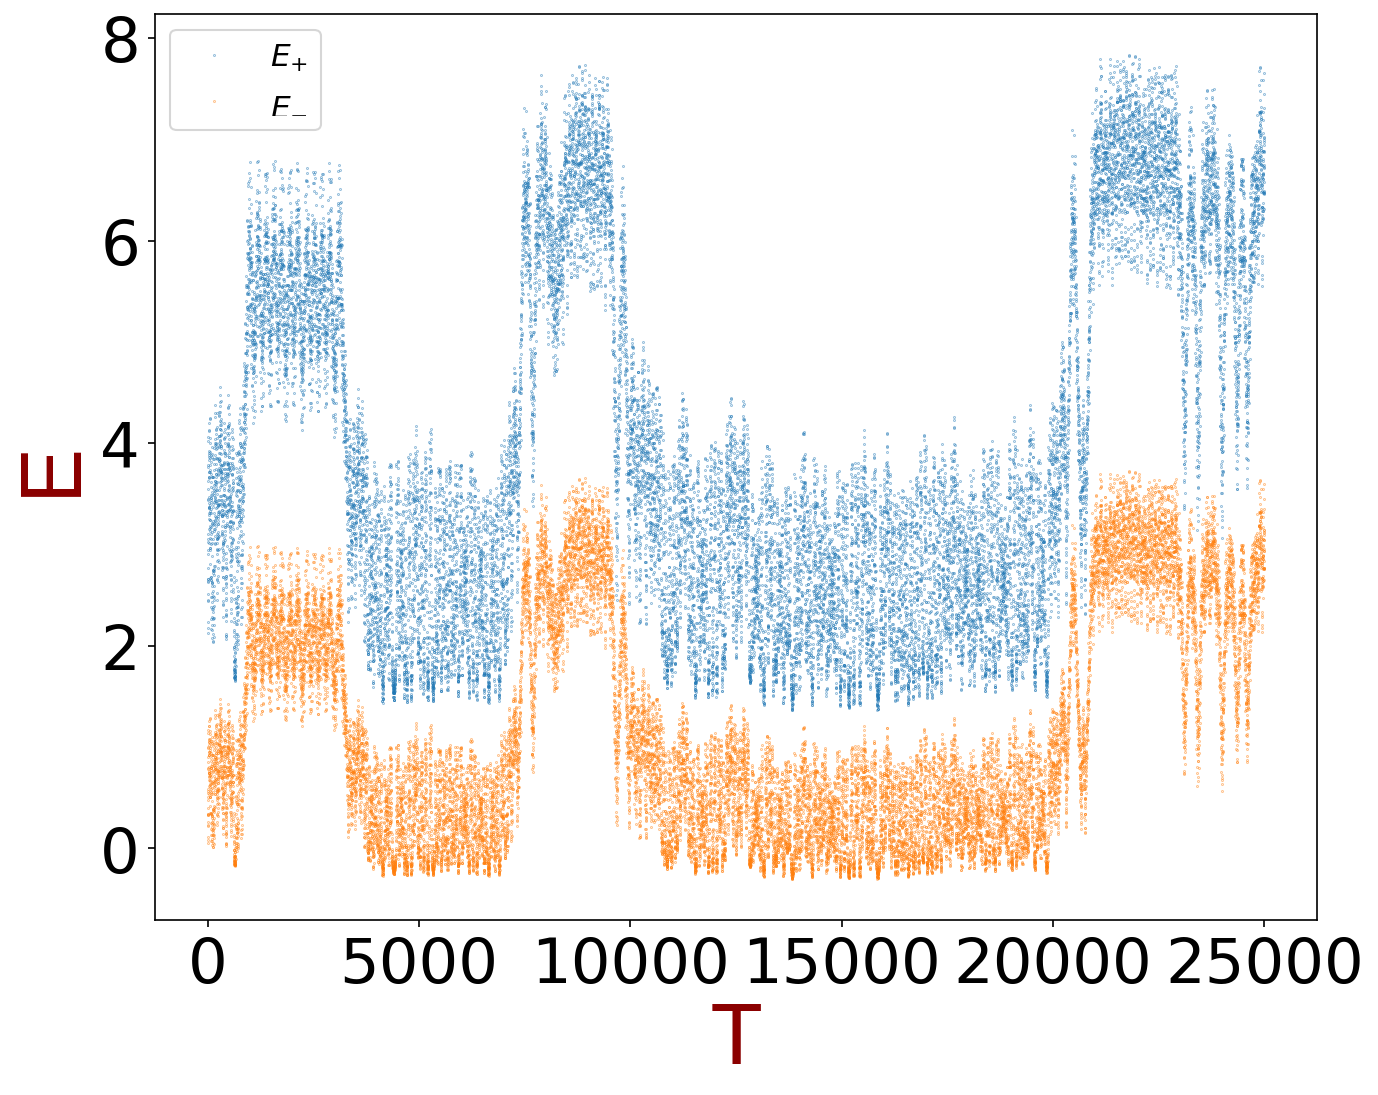

In [30]:
eplus = []
eminus = []

for i in range(len(Q)):
    x = np.real(Q)
    p = np.real(P)
    eplus.append(w**2*x[i]**2/2 + p[i]**2/2 + w/2 + 2*gx*np.sqrt(w*x[i]**2/2 + p[i]**2/2/w + 1))
    eminus.append(w**2*x[i]**2/2 + p[i]**2/2 + w/2 - 2*gx*np.sqrt(w*x[i]**2/2 + p[i]**2/2/w + 1))
    
plt.figure(figsize=(10,8), dpi=150)
plt.plot(np.round(eplus, 4), 'o', ms=0.2, label=r'$E_{+}$')
plt.plot(np.round(eminus, 4), 'o', ms=0.2, label=r'$E_{-}$')
plt.xlabel('T', fontdict=font)
plt.ylabel('E', fontdict=font)
plt.tick_params(labelsize=textsize)
plt.legend()
plt.savefig('images/qubit/arabi/energy,' + 'r=' +str(r) + ',f0=' + str(phi) + ',gx=' + str(gx) + '.png', dpi=fig.dpi)
plt.show()

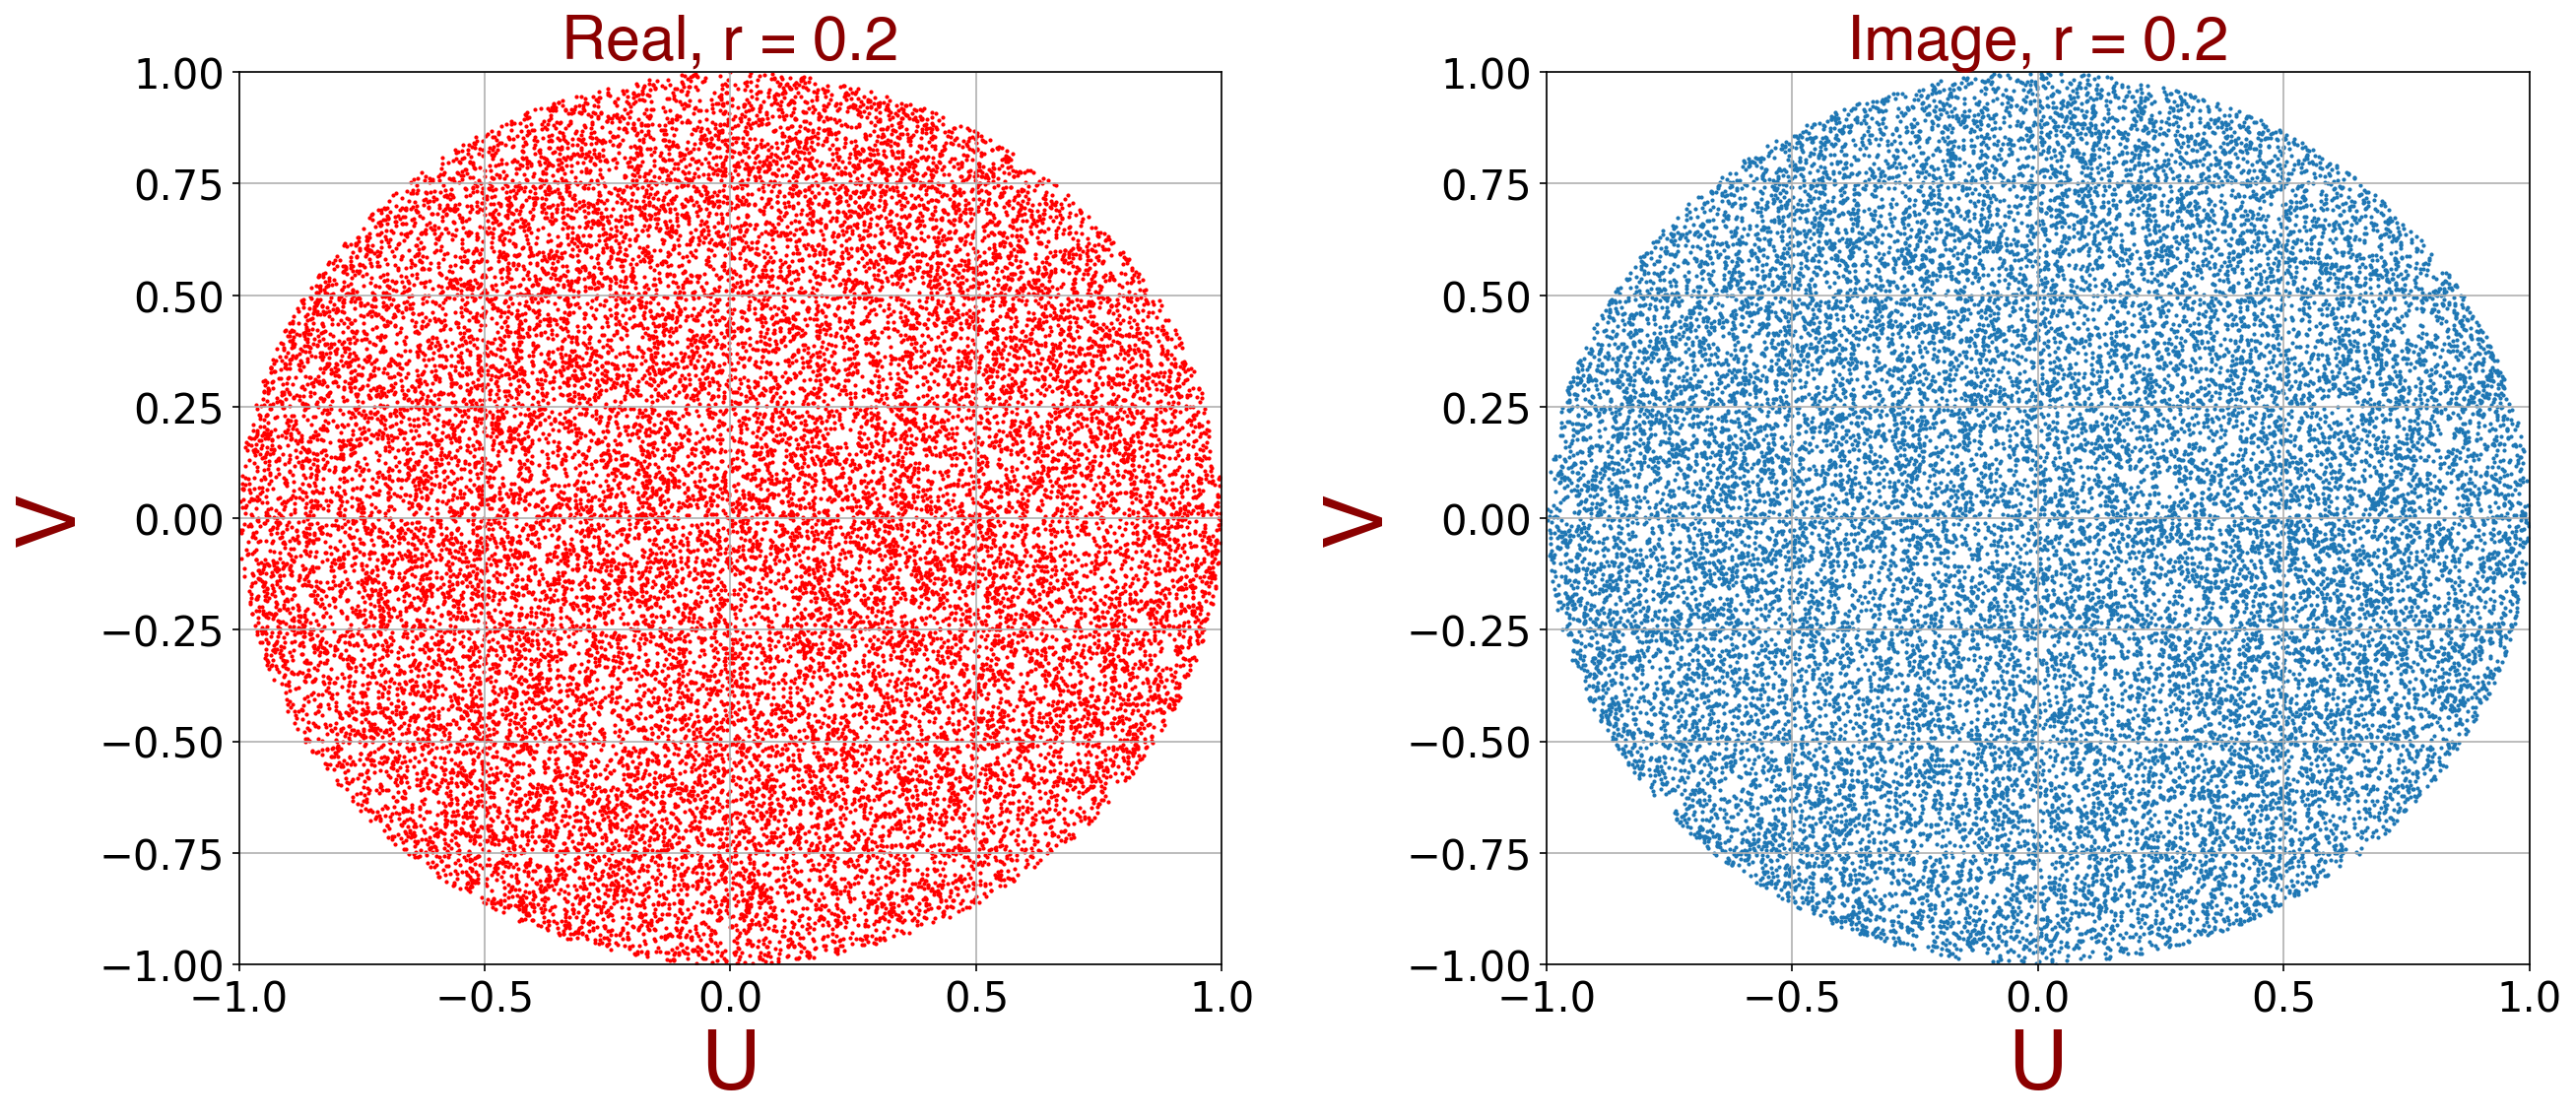

last norm:  0.9995


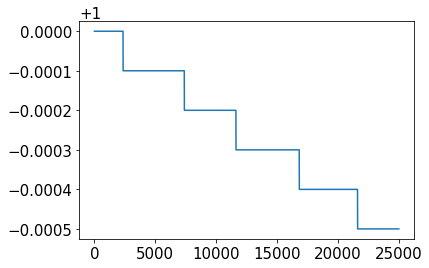

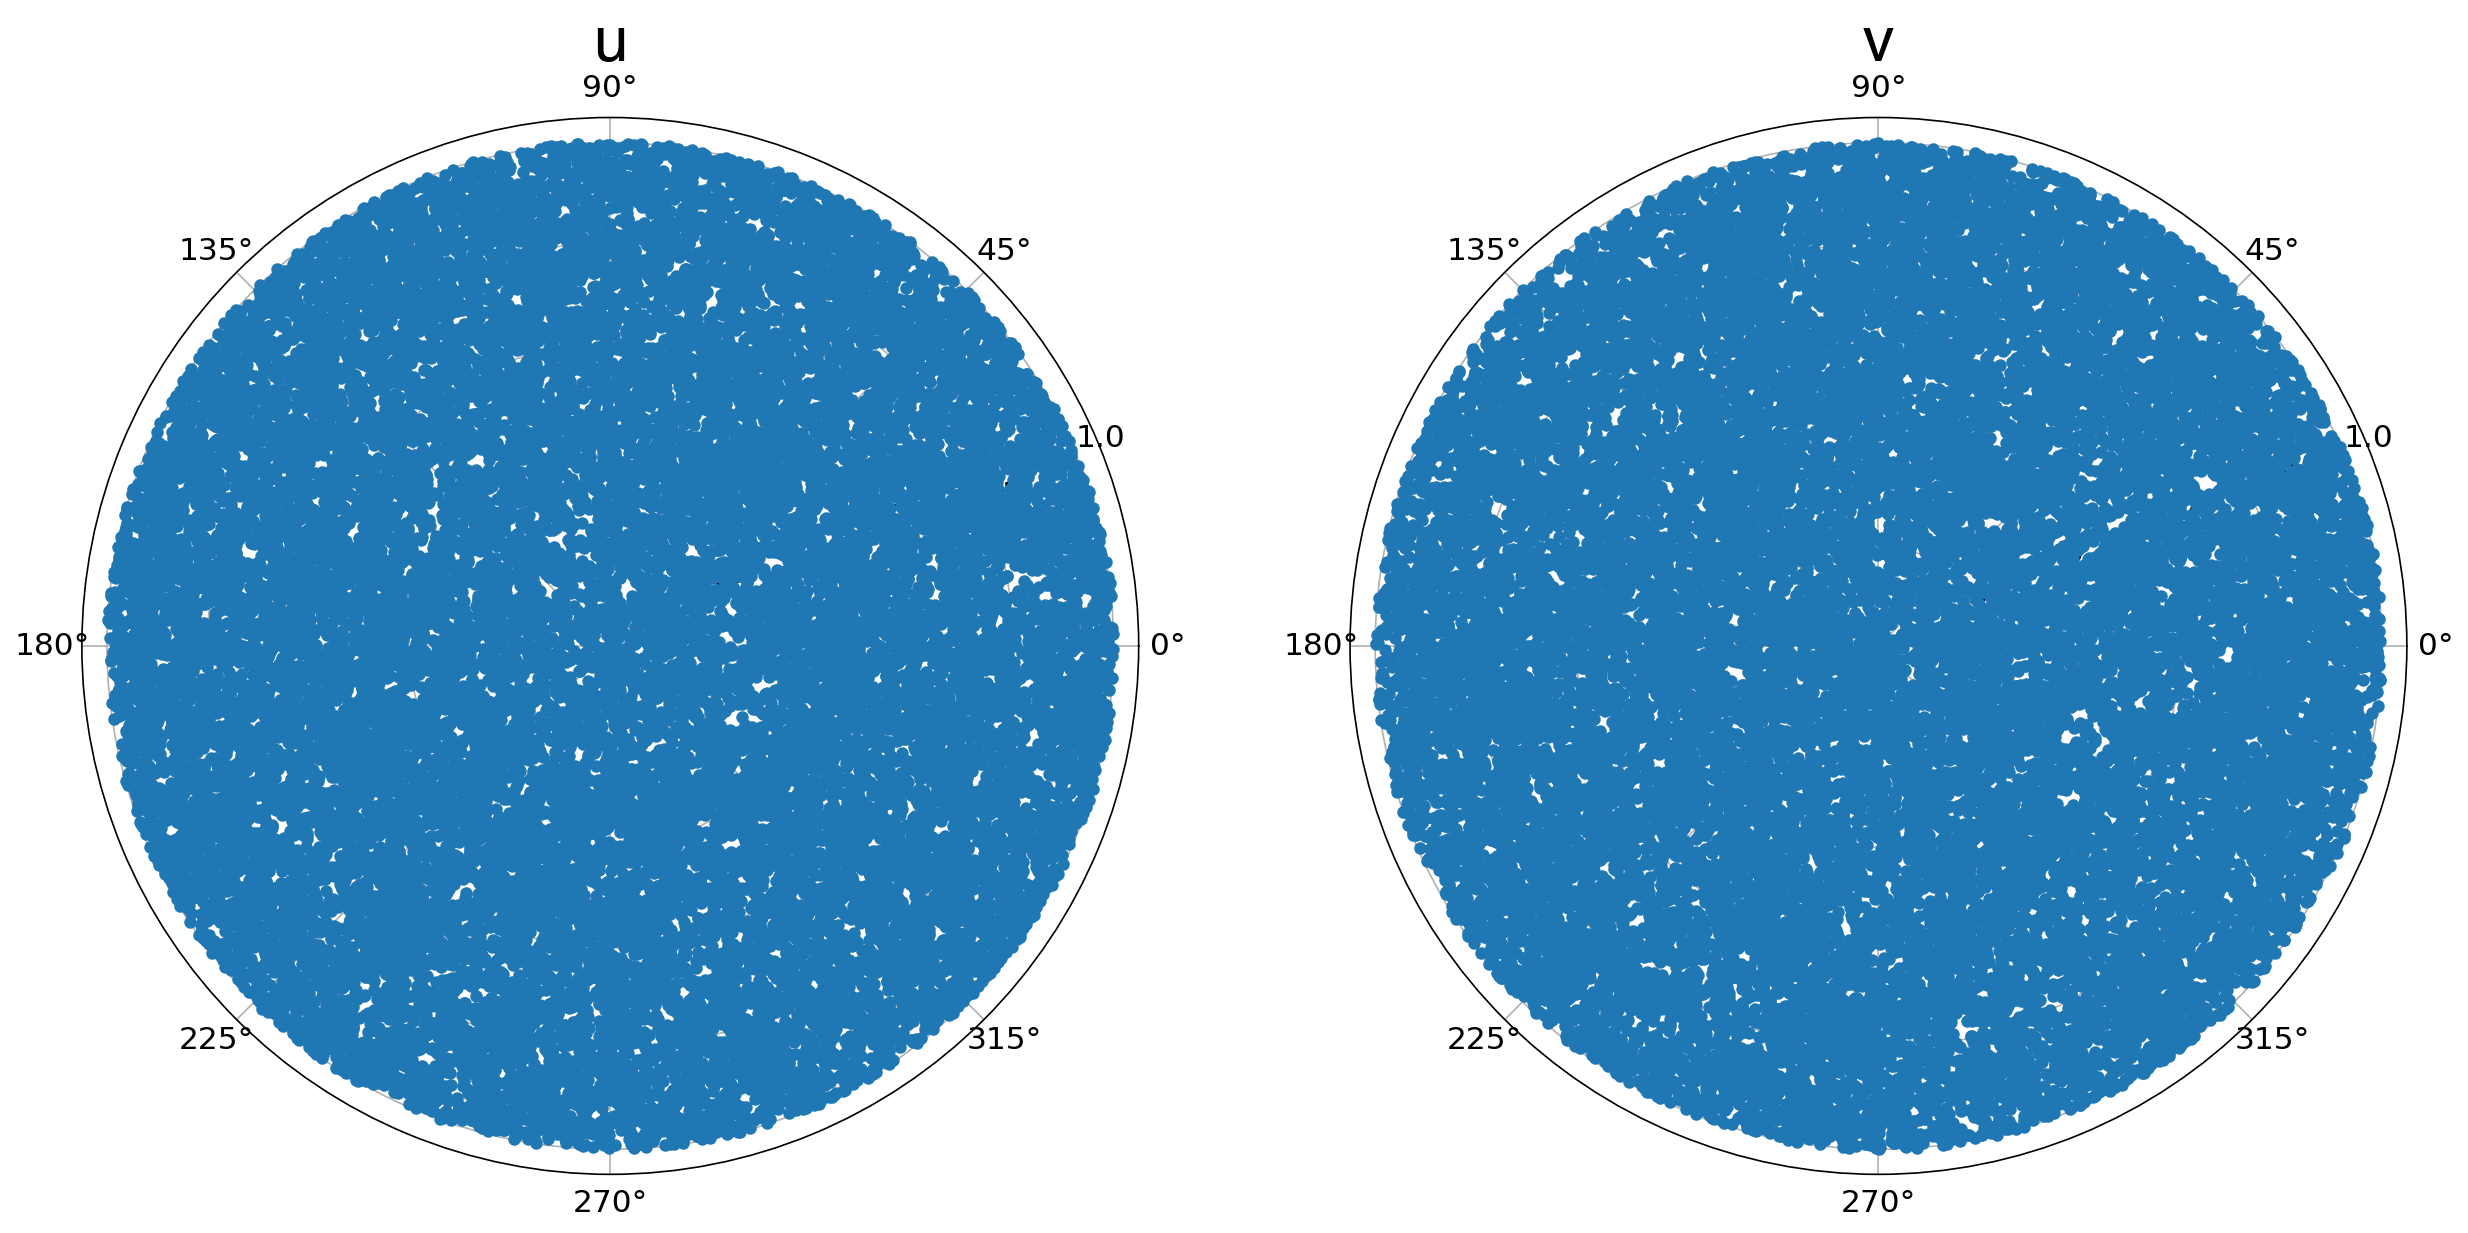

In [31]:
#  plot for (u, v)
fig = plt.figure(figsize=(20, 8), dpi=150)
fig.subplots_adjust(wspace=0.33)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sc1 = ax1.scatter(U.real,V.real, s=1, c='red')
sc2 = ax2.scatter(U.imag,V.imag, s=1)

limit=np.max(np.ceil(np.absolute(U))) # set limits for axis
ax1.axis(xmin=-limit,xmax=limit, ymin=-limit, ymax=limit)
ax2.axis(xmin=-limit,xmax=limit, ymin=-limit, ymax=limit)

ax1.set_xlabel('U', fontdict=font)
ax1.set_ylabel('V', fontdict=font)
ax2.set_xlabel('U', fontdict=font)
ax2.set_ylabel('V', fontdict=font)

ax1.set_title('Real, r = ' + str(r), fontdict=fontTitle)
ax1.grid()
ax1.tick_params(labelsize=20)
ax2.set_title('Image, r = ' + str(r), fontdict=fontTitle)
ax2.tick_params(labelsize=20)
ax2.grid()

plt.show()

#  plot for (u, v)
fig1 = plt.figure(figsize=(10,8), dpi=150)
limit=np.max(np.ceil(np.absolute(U))) # set limits for axis
plt.axis(xmin=-limit,xmax=limit, ymin=-limit, ymax=limit)

plt.scatter(U.real,V.real, s=1, c='red')
plt.xlabel('U', fontdict=font)
plt.ylabel('V', fontdict=font)
plt.title('Real', fontdict=fontTitle)
plt.grid()
plt.tick_params(labelsize=20)
#fig1.savefig('images/qubit/arabi/qubit_uv_re,' + 'r=' + str(r) + ',f0=' + str(phi) + ',gx=' + str(gx) + '.png', dpi=fig.dpi)
plt.close(fig1)

fig2 = plt.figure(figsize=(10,8), dpi=150)
limit=np.max(np.ceil(np.absolute(U))) # set limits for axis
plt.axis(xmin=-limit,xmax=limit, ymin=-limit, ymax=limit)
plt.scatter(U.imag,V.imag, s=1)
plt.xlabel('U', fontdict=font)
plt.ylabel('V', fontdict=font)
plt.title('Image', fontdict=fontTitle)
plt.tick_params(labelsize=20)
plt.grid()

#fig2.savefig('images/qubit/arabi/qubit_uv_im,' + 'r=' + str(r) + ',f0=' + str(phi) + ',gx=' + str(gx) + '.png', dpi=fig.dpi)
plt.close(fig2)

#  norm of the spinor (u, v).T
ss = []
for i in range(len(U)):
    ss.append(np.sqrt(abs(U[i])**2 + abs(V[i])**2))
    
ss = np.round(ss, 4)
plt.plot(ss)

print('last norm: ', ss[-1])


#  polar plot for u(r, angle) and v(r, angle)
angleU = list(map(lambda x: mp.atan2(x.real, x.imag), U))
radU = abs(U)
angleV = list(map(lambda x: mp.atan2(x.real, x.imag), V))
radV = abs(V)

fig = plt.figure(figsize=(20, 10), dpi=150)
fig.subplots_adjust(wspace=0.2)
plt.rcParams.update({'font.size': 15})
ax1 = fig.add_subplot(121, polar=True)
ax2 = fig.add_subplot(122, polar=True)

sc1 = ax1.plot(angleU, radU, marker='o', markersize=5, linestyle = 'None')
sc2 = ax2.plot(angleV, radV, marker='o', markersize=5, linestyle = 'None')

ax1.set_title('u', fontname='Helvetica', size=30)
ax2.set_title('v', fontname='Helvetica', size=30)
plt.show()

fig = plt.figure(figsize=(10,8), dpi=300)
plt.polar(angleU, radU, marker='o', markersize=5, linestyle = 'None')
plt.title('u', fontdict=fontTitle)
plt.tick_params(labelsize=20)
plt.yticks([radU[-1]])
#fig.savefig('images/qubit/arabi/qubit_polaru,' + 'r=' + str(r) + ',f0=' + str(phi) + ',gx=' + str(gx) + '.png', dpi=fig.dpi)
plt.close(fig)


fig = plt.figure(figsize=(10,8), dpi=300)
plt.polar(angleV, radV, marker='o', markersize=5, linestyle = 'None')
plt.title('v', fontdict=fontTitle)
plt.tick_params(labelsize=20)
plt.yticks([radV[-1], radU[0]])
#fig.savefig('images/qubit/arabi/qubit_polarv,' + 'r=' + str(r) + ',f0=' + str(phi) + ',gx=' + str(gx) + '.png', dpi=fig.dpi)
plt.close(fig)

## Plot Bloch sphere for qubit

In [ ]:
%%time
thett = np.array([complex(np.arcsin(2 * u * v)) for u, v in zip(U, V)])
phii = np.array([complex(-2j * np.log(u / np.cos(complex(np.arcsin(2 * u * v))/2))) for u, v in zip(U, V)])

#print(U[1])
#print(np.cos(thett[1]/2)*np.exp(1j * phii[1]/2))
#print(V[1])
#print(np.sin(thett[1]/2)*np.exp(-1j * phii[1]/2))

states = list(map(lambda theta, phi: qutip.Qobj([[np.cos(theta/2)*np.exp(1j * phi/2)],[np.sin(theta/2)*np.exp(-1j * phi/2)]]).unit(), 
             thett, phii))


#plt.plot([np.sqrt(sum(abs(np.asarray(states[i]))**2)) for i in range(len(states))], 'o', markersize=1)
#plt.show()

colors = ['blue' for i in range(len(states))]
colors[-1] = 'red'
colors[0] = 'lime'
#print(colors)

b = qutip.Bloch(figsize=(10,8))


## customize sphere properties ##
b.point_color = colors # options: 'r', 'g', 'b' etc.
b.vector_color = ['green', 'red']
b.point_marker = ['o']
b.point_size = [5]
b.xlabel = ['$ \dfrac{1}{2} [1, 1]^T $', '$ \dfrac{1}{2} [1, -1]^T $']
b.ylabel = ['$ \dfrac{1}{2} [1, i]^T $', '$ \dfrac{1}{2} [1, -i]^T $']
b.frame_width = 1
b.font_size = textsize
b.add_states([states[0], states[-1]])
b.add_states(states, 'point')
plt.tight_layout()
b.view = [-60, 30]

b.render()

bb = b.fig


In [ ]:
bb.savefig('images/qubit/arabi/qubitBloch,' + 'r=' + str(r) + ',f0=' + str(phi) + ',gx=' + str(gx) + '.png',dpi=150)

In [ ]:
plt.plot(np.real(Q), linewidth=0.5)
plt.plot(np.real(P), linewidth=0.5)
plt.show()
plt.scatter(np.real(Q), np.real(P))
plt.scatter(np.real(U), np.real(V))

# Спектр мощности

25001


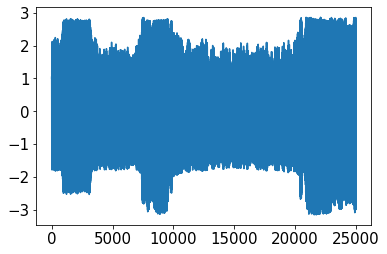

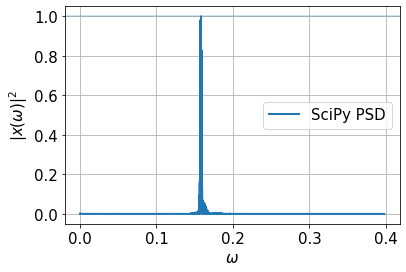

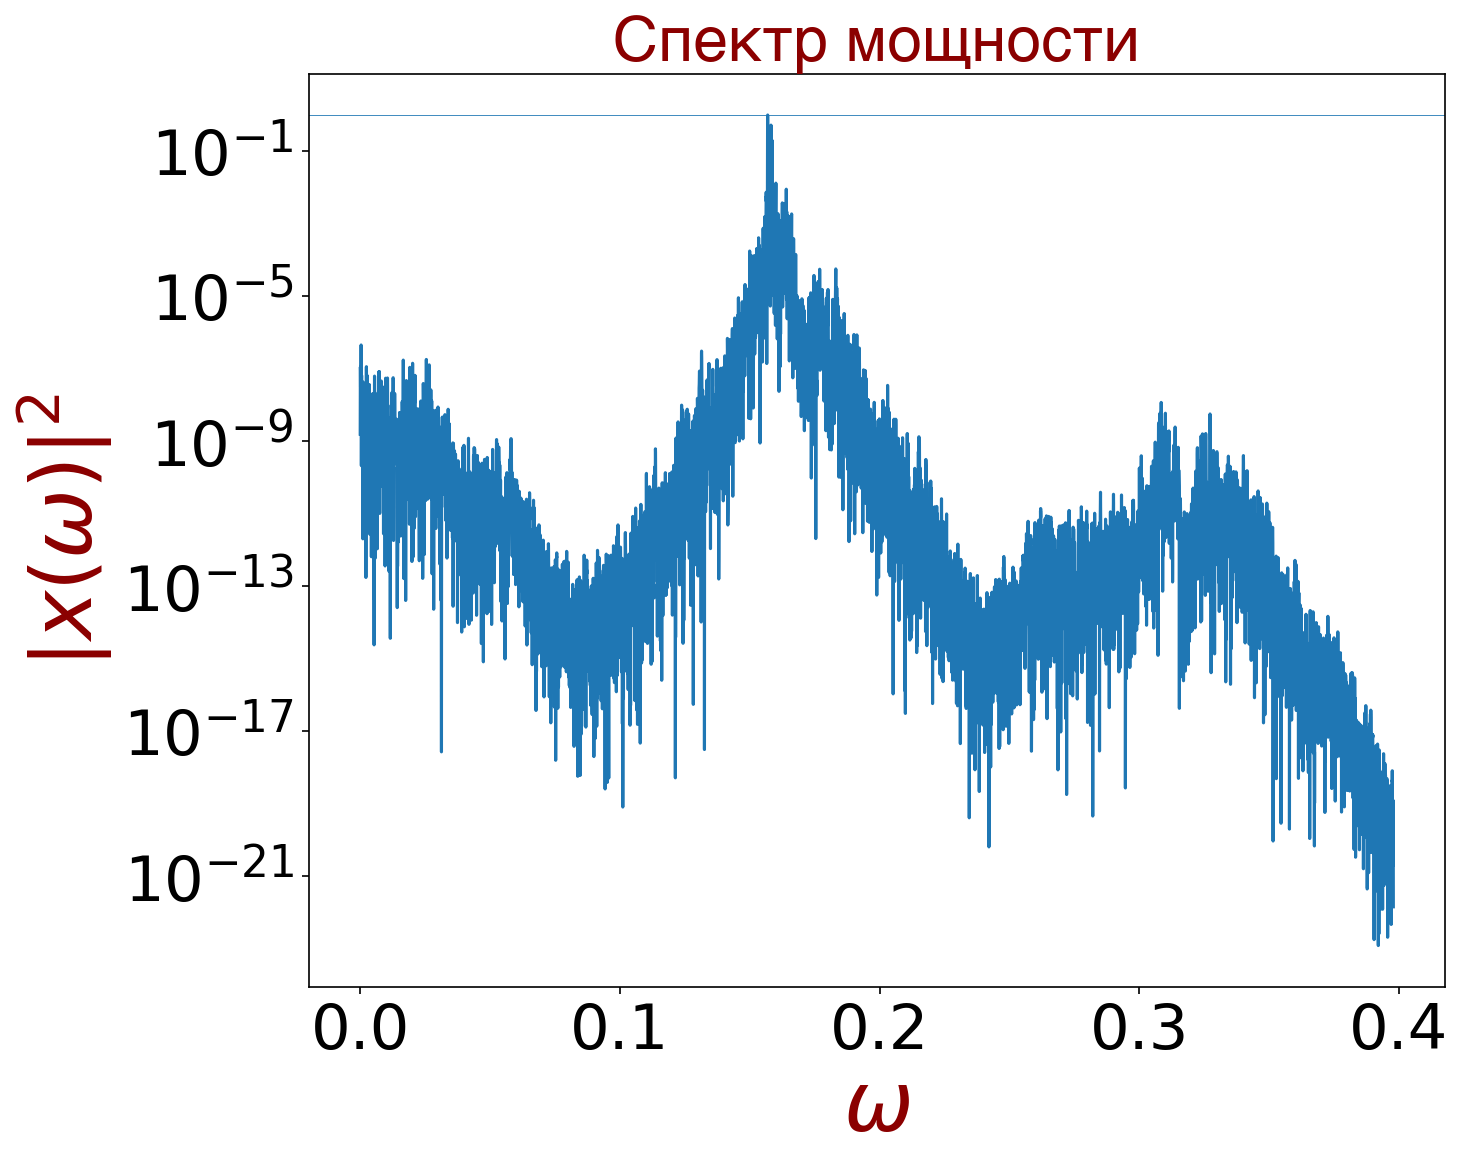

In [32]:
import scipy as sp
from scipy import signal


print(len(Q))
data = np.real(Q)
plt.plot(data)
plt.show()
fourier = abs(sp.fft.fft(data))**2
#fourier = np.mean(fourier)
fourier /= np.max(fourier)

n = data.size
timestep = Tk
freq = np.fft.fftfreq(n, d=timestep)
mask = freq>=0

plt.plot(freq[mask], fourier[mask], label='SciPy PSD', lw=2)
#plt.plot(freq[~mask], fourier[~mask])  #  отрицательная часть ввиду симметрии преобразования Фурье
plt.grid()
plt.axhline(y=10e-1, lw=0.4)
plt.legend()
#plt.xlim([-0.1, 5])
plt.xlabel('$\omega$')
plt.ylabel('$|x( \omega)|^2$')
plt.show()


fs = 1/Tk
# signal.welch
f, Pxx_spec = signal.welch(data, fs, 'flattop', len(data), scaling='spectrum')
psd = abs(Pxx_spec)**2
psd /= max(psd)
plt.figure(figsize=(10,8), dpi=150)
plt.semilogy(f, psd)
plt.xlabel(r'$\omega$', fontdict=font)
plt.ylabel(r'$|x( \omega)|^2$', fontdict=font)
plt.title('Спектр мощности', fontdict=fontTitle)
plt.tick_params(labelsize=textsize)
plt.tight_layout()
plt.axhline(y=1, lw=0.4)
plt.savefig('images/qubit/arabi/psd,' + 'r=' + str(r) + ',f0=' + str(phi) + ',gx=' + str(gx) + '.png', dpi=fig.dpi)
plt.show()

## Показатель Ляпунова для данного случая

In [33]:
from scipy.integrate import solve_ivp


#  initial conditions
#-----------------------
w = 1                  #  photonic field frequency
w2 = w                 #  qubit frequency
Tk = 2 * r * np.pi / w #  period of an external driving force 

q0 = 1                 #  initial coordinate
p0 = 1                 #  initial impulse
u0 = 1e-20     #  initial spinor component U
v0 = 1      #  initial spinor component V


print('Tk = ', Tk)
print('T = ', 2 * np.pi / w)


#  define system of motion equations 
def func(t, z, gx):
    p, q, u, v = z
    gy = gx
    return [-w**2*q - 2*gx*gy*(np.abs(u)**2 - np.abs(v)**2) +\
            (gy*w2 - gx)*(np.conj(u)*v + np.conj(v)*u), p, 
            ((w2/2)*u + gx*q*v - gy*1j*p*v)/1j, (-(w2/2)*v + gx*q*u + gy*1j*p*u)/1j]


def poincare(n_steps, p0, q0, u0, v0, r, gx):

    Tk = 2 * r * np.pi / w #  period of an external driving force 
    
    Q = np.zeros(n_steps + 1, dtype=complex) 
    P = np.zeros(n_steps + 1, dtype=complex)    
    U = np.zeros(n_steps + 1, dtype=complex)   
    V = np.zeros(n_steps + 1, dtype=complex)

    P[0] = p0
    Q[0] = q0
    U[0] = u0
    V[0] = v0

    #  mapping for (p, q, u, v)
    for n in notebook.tqdm(range(1, n_steps + 1)):

        tn = Tk * (n - 1)

        p01 = P[n - 1]
        q01 = Q[n - 1]    
        u01 = (np.cos(phi) * U[n - 1] - 1j * np.sin(phi) * V[n - 1])*np.exp(1j * w2 * Tk)
        v01 = (-1j*np.sin(phi) * U[n - 1] + np.cos(phi) * V[n - 1])*np.exp(1j * w2 * Tk)

        z0 = [p01, q01, u01, v01]

        sol = solve_ivp(lambda t,y: func(t,y,gx), [tn ,tn + Tk], z0)
        #solve_ivp(func, [tn ,tn + Tk], z0, args=(ge))

        #print(sol)
        P[n] = sol.y[0,-1]
        Q[n] = sol.y[1,-1]
        U[n] = sol.y[2,-1]
        V[n] = sol.y[3,-1]
    return P, Q, U, V


T_steps = 25000
P1, Q1, U1, V1 = poincare(T_steps, p0, q0, u0, v0, r, gx)
P2, Q2, U2, V2 = poincare(T_steps, p0 + 1e-6, q0, u0, v0, r, gx)
dx = np.abs(Q2 - Q1)
dp = np.abs(P2 - P1)
du = np.abs(U2 - U1)
dv = np.abs(V2 - V1)
Dist = np.abs(dx**2 + dp**2 + du**2 + dv**2)
LogDist = np.log(Dist)
print(LogDist[-1])
print(np.mean(LogDist))

Tk =  1.2566370614359172
T =  6.283185307179586


  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

1.3138041553297706
1.01098255458719


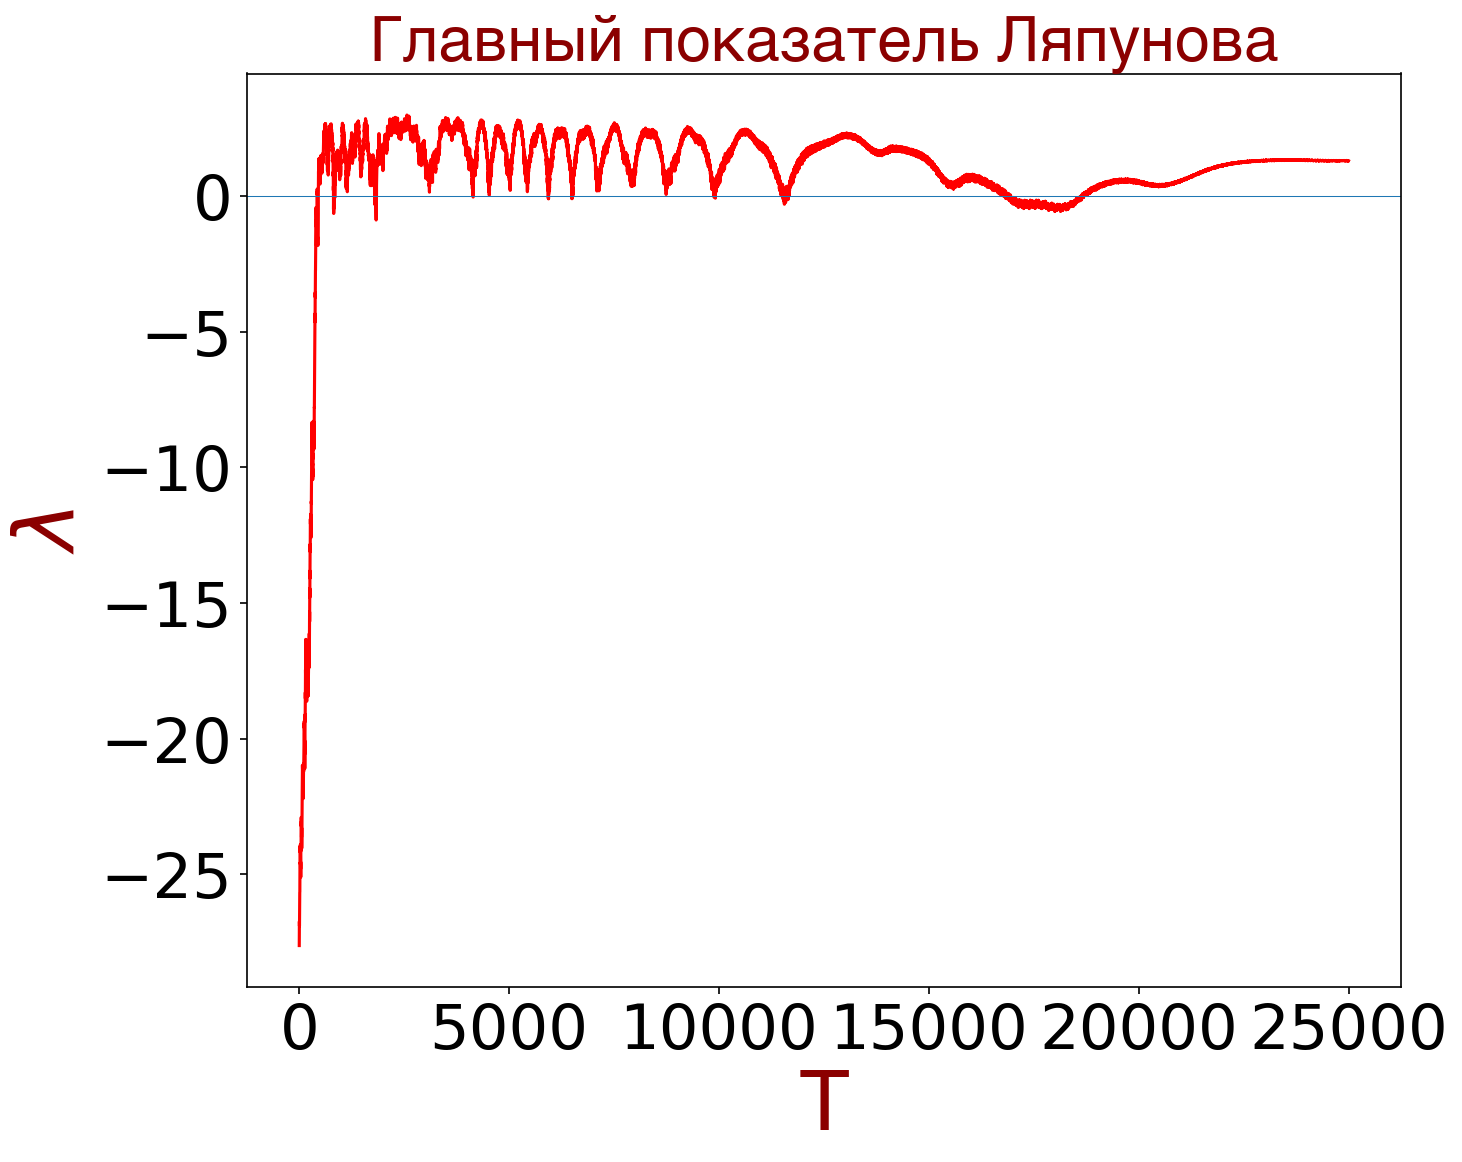

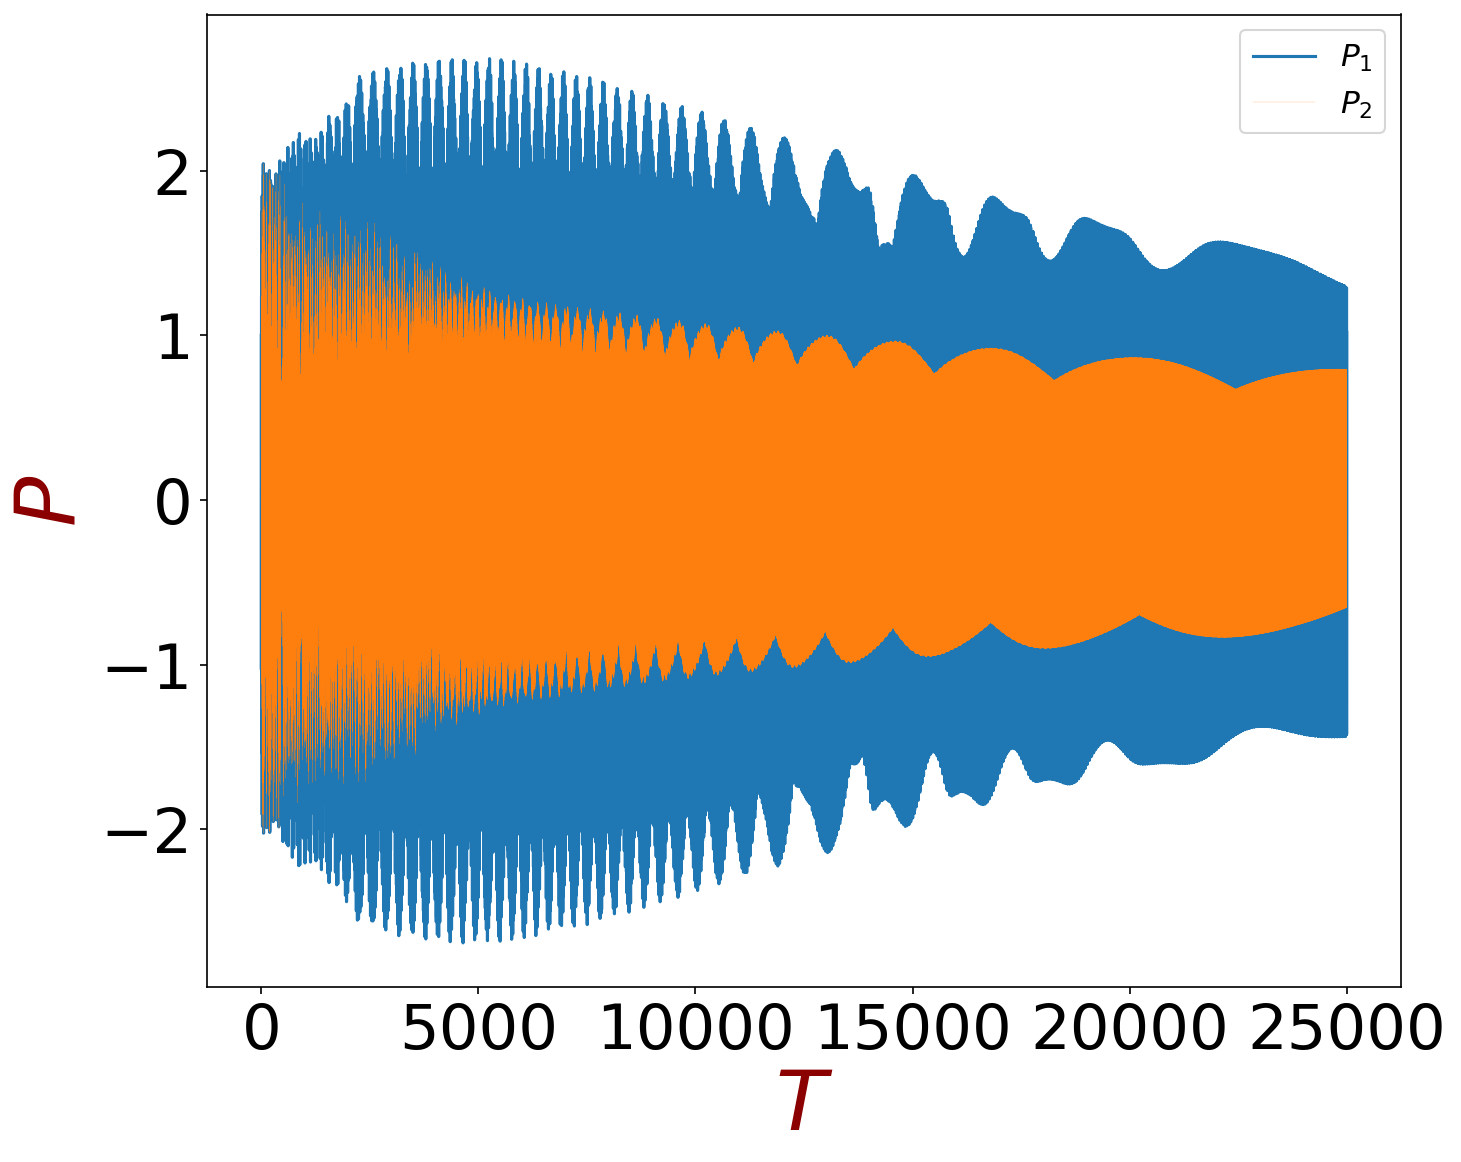

In [34]:
plt.figure(figsize=(10, 8), dpi=150)
plt.plot(LogDist, c='red')
plt.axhline(y=0, lw=0.5)
plt.xlabel('T', fontdict=font)
plt.ylabel(r'$\lambda$', fontdict=font)
plt.tick_params(labelsize=textsize)
plt.title('Главный показатель Ляпунова', fontdict=fontTitle)
plt.tight_layout()
plt.savefig('images/qubit/arabi/mainlyap,' + 'r=' + str(r) + ',f0=' + str(phi) + ',gx=' + str(gx) + '.png',dpi=150)
plt.show()

plt.figure(figsize=(10, 8), dpi=150)
plt.plot(np.real(P1), label='$P_1$')
plt.plot(np.real(P2), '-', lw=0.1, label='$P_2$')
plt.xlabel(r'$T$', fontdict=font)
plt.ylabel(r'$P$', fontdict=font)
plt.tick_params(labelsize=textsize)
plt.legend()
plt.tight_layout()
plt.savefig('images/qubit/arabi/difftr,' + 'r=' + str(r) + ',f0=' + str(phi) + ',gx=' + str(gx) + '.png',dpi=150)
plt.show()

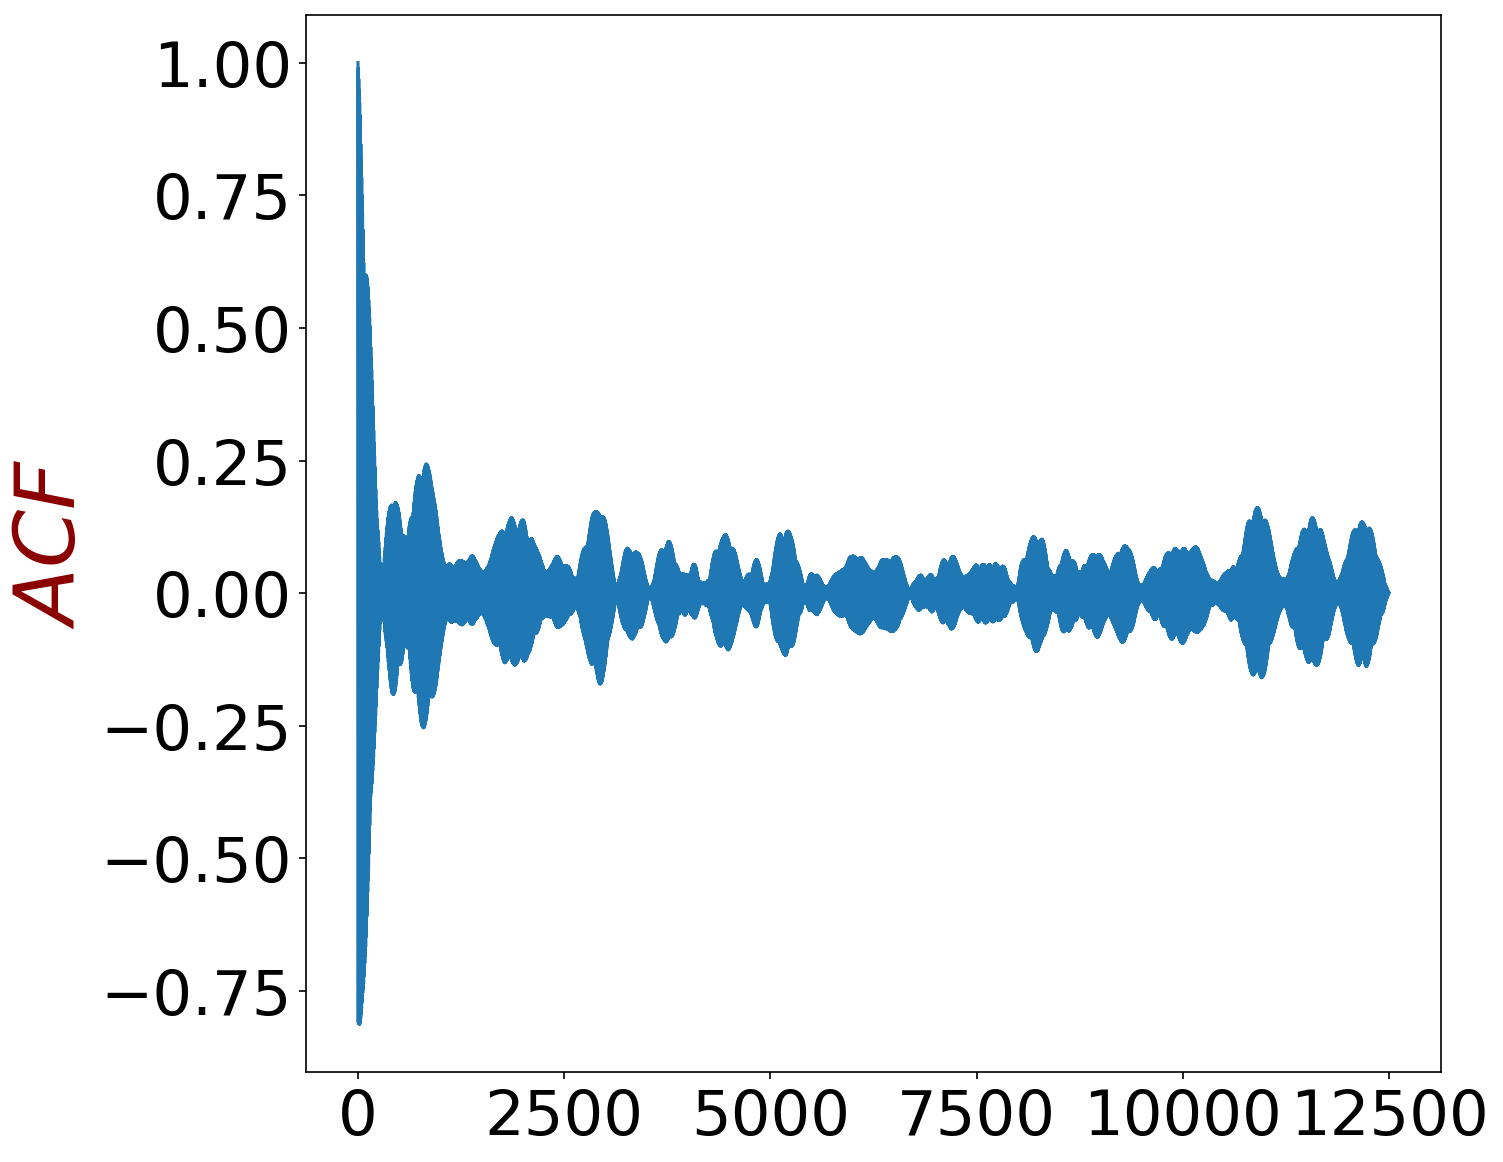

In [35]:
def autocorrelation(x) :
    """
    Compute the autocorrelation of the signal, based on the properties of the
    power spectral density of the signal.
    """
    xp = x-np.mean(x)
    f = np.fft.fft(xp)
    p = np.abs(f)**2
    pi = np.fft.ifft(p)
    return np.real(pi)[:x.size//2]/np.sum(xp**2)

plt.figure(figsize=(10, 8), dpi=150)
plt.plot(autocorrelation(data))
plt.ylabel(r'$ACF$', fontdict=font)
plt.tick_params(labelsize=textsize)
plt.tight_layout()
plt.savefig('images/qubit/arabi/acorr,' + 'r=' + str(r) + ',f0=' + str(phi) + ',gx=' + str(gx) + '.png',dpi=150)
plt.show()

# Главный показатель Ляпунова. Биффуркационная диаграмма

In [ ]:
rs_up = []
rs_down = []
steps = 100

# Take num_steps=4000 to get Figure 9.13.
a, b = p0, q0
ns = np.linspace(0, 0.9, steps)
lyaps = []
lyaps1 = []
shift = 1e-6
T_steps = 300

# Ramp the amplitude of vibration, gamma, up.
for n in notebook.tqdm(ns):
    P1, Q1, U1, V1 = poincare(T_steps, p0, q0, u0, v0, 1/2, n)
    P2, Q2, U2, V2 = poincare(T_steps, p0 + shift, q0, u0, v0, 1/2, n)
    dx = np.abs(Q2 - Q1)
    dp = np.abs(P2 - P1)
    du = np.abs(U2 - U1)
    dv = np.abs(V2 - V1)
    Dist = np.abs(dx**2 + dp**2 + du**2 + dv**2)
    LogDist = np.log(Dist)
    lyaps.append(np.mean(LogDist))
    for i in range(2):
        a = P1[T_steps]
        b = Q1[T_steps]
        c = U1[T_steps]
        d = V1[T_steps]
        r = np.abs(a**2 + b**2 + c**2 + d**2)
        rs_up.append([n, r]) 
    
rs_up = np.array(rs_up)
lyaps = np.array(lyaps)

# Ramp the amplitude of vibration, gamma, down.
for n in notebook.tqdm(ns):
    F = 0.9 - n
    P1, Q1, U1, V1 = poincare(T_steps, p0, q0, u0, v0, 1/2, F)
    P2, Q2, U2, V2 = poincare(T_steps, p0 + shift, q0, u0, v0, 1/2, F)
    dx = np.abs(Q2 - Q1)
    dp = np.abs(P2 - P1)
    du = np.abs(U2 - U1)
    dv = np.abs(V2 - V1)
    Dist = np.abs(dx**2 + dp**2 + du**2 + dv**2)
    LogDist = np.log(Dist)
    lyaps1.append(np.mean(LogDist))
    for i in range(2):
        a = P1[T_steps]
        b = Q1[T_steps]
        c = U1[T_steps]
        d = V1[T_steps]
        r = np.abs(a**2 + b**2 + c**2 + d**2)
        rs_down.append([F, r]) 
    
rs_down = np.array(rs_down)
lyaps1 = np.array(lyaps1)

plt.figure(figsize=(10, 8), dpi=250)
plt.plot(rs_up[:, 0], rs_up[:,1], 'r.', ms=0.9, label='$r$ up')
plt.plot(rs_down[:, 0], rs_down[:,1], 'b.', ms=0.1, label='$r$ down')
plt.axhline(y=0, lw=0.2)
plt.xlabel(r'$g$')
plt.ylabel(r'$r$')
# Plot legend.
lgnd = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#change the marker size manually for both lines
lgnd.legendHandles[0]._legmarker.set_markersize(6)
lgnd.legendHandles[1]._legmarker.set_markersize(6)
#plt.ylim([-0.1,0.1])
plt.tight_layout()
plt.savefig('biff,' + 'r=' + str(r) + ',f0=' + str(phi) + '.png', dpi=250)



fig, axs = plt.subplots(2)
plt.subplots_adjust(hspace=0.7)
axs[0].plot(ns, lyaps, 'r.', ms=0.2, label=r'$\lambda$')
axs[0].axhline(y=0, lw=0.2)
axs[0].set_title(r'$\lambda$ (LogDist) up')
axs[1].plot(ns, lyaps1[::-1], 'b.', ms=0.2, label=r'$\lambda$')
axs[1].set_title(r'$\lambda$ (LogDist) down')
axs[1].axhline(y=0, lw=0.2)
axs[1].set(xlabel=r'$g_e$', ylabel=r'$\lambda$')
axs[0].set(xlabel=r'$g_e$', ylabel=r'$\lambda$')
plt.tight_layout()
plt.savefig('lyaps,' + 'r=' + str(r) + ',f0=' + str(phi) + '.png', dpi=250)

In [ ]:
plt.figure(figsize=(10, 8), dpi=150)
plt.plot(rs_up[:, 0], rs_up[:,1] + 4, 'r.', ms=0.9, label='$4r + 2$ up')
plt.plot(rs_down[:, 0], rs_down[:,1] + 4, 'b.', ms=0.1, label='$4r + 2$ down')
plt.axhline(y=0, lw=0.2)
plt.plot(ns, lyaps, 'k', ms=0.1, label='$\lambda$ up, shift=' + str(shift))
#plt.plot(ns*step, lyaps1[::-1]-5, 'orange', ms=0.1, label='$\lambda$ (LogDist) down, shift=' + str(shift) + 
#         ',\n zero at y=-5')
plt.axhline(y=-5, lw=0.2)
plt.xlabel(r'$g$')
plt.ylabel(r'$r$')
# Plot legend.
lgnd = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#change the marker size manually for both lines
lgnd.legendHandles[0]._legmarker.set_markersize(6)
lgnd.legendHandles[1]._legmarker.set_markersize(6)
#plt.ylim([-0.1,0.1])
plt.show()

In [ ]:
fig, axs = plt.subplots(2)
plt.subplots_adjust(hspace=0.7)
axs[0].plot(rs_up[:, 0], rs_up[:,1], 'r.', ms=0.1, label='$r$ up')
axs[0].axhline(y=0, lw=0.2)
axs[0].set_title('Largest Lyapunov exponent')
axs[1].plot(rs_down[:, 0], rs_down[:,1], 'b.', ms=0.1, label='$r$ down')
axs[1].axhline(y=0, lw=0.2)
axs[1].set(xlabel='$g_e$', ylabel='$r$ up)
axs[0].set(xlabel='$g_e$', ylabel='$r$ down')

fig, axs = plt.subplots(2)
plt.subplots_adjust(hspace=0.7)
fig.suptitle('Largest Lyapunov exponent')
axs[0].plot(ns, lyaps, 'k', ms=0.1)
axs[0].axhline(y=0, lw=0.2)
axs[0].set_title('$\lambda$ (LogDist) up')
axs[1].plot(ns, lyaps1[::-1], 'orange', ms=0.1)
axs[1].axhline(y=0, lw=0.2)
axs[1].set_title('r')
for ax in axs.flat:
    ax.set(xlabel='$F$', ylabel='$\lambda$')
plt.show()

In [ ]:
def autocorrelation(x) :
    """
    Compute the autocorrelation of the signal, based on the properties of the
    power spectral density of the signal.
    """
    xp = x-np.mean(x)
    f = np.fft.fft(xp)
    p = np.abs(f)**2
    pi = np.fft.ifft(p)
    return np.real(pi)[:x.size//2]/np.sum(xp**2)

plt.plot(autocorrelation(data))

### Rest and Tests